# Pymaceuticals Inc.
---

### Analysis

- There were very few outliers in this study, meaning that results can be considered very reliable. 
- Capomulin seems to be the most successful treatment by far. 
- Weight seems to be the largest factor in the success of a regimen. The larger the mouse, the less the tumor was shrunk. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset

total_results = pd.merge(mouse_metadata, study_results, how= "outer", on="Mouse ID")

# Display the data table for preview

total_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice = total_results.groupby("Mouse ID")
mice["Mouse ID"].count()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = total_results.loc[total_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [7]:
len(total_results ["Mouse ID"].unique())

249

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = total_results.loc[total_results["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data = total_results.loc[total_results["Mouse ID"] != "g989"]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.

len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = clean_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = clean_mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regimen_variance

regimen_deviation = clean_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regimen_deviation

regimen_SEM = clean_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
regimen_SEM

# Assemble the resulting series into a single summary DataFrame.

total_regimen = pd.DataFrame({"Mean Tumor Volume":regimen_mean, 
                            "Median Tumor Volume": regimen_median, 
                            "Tumor Volume Variance": regimen_variance,
                            "Tumor Volume Std. Dev.": regimen_deviation,
                            "Tumor Volume Std. Err.": regimen_SEM})
total_regimen



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line.

summary_table = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

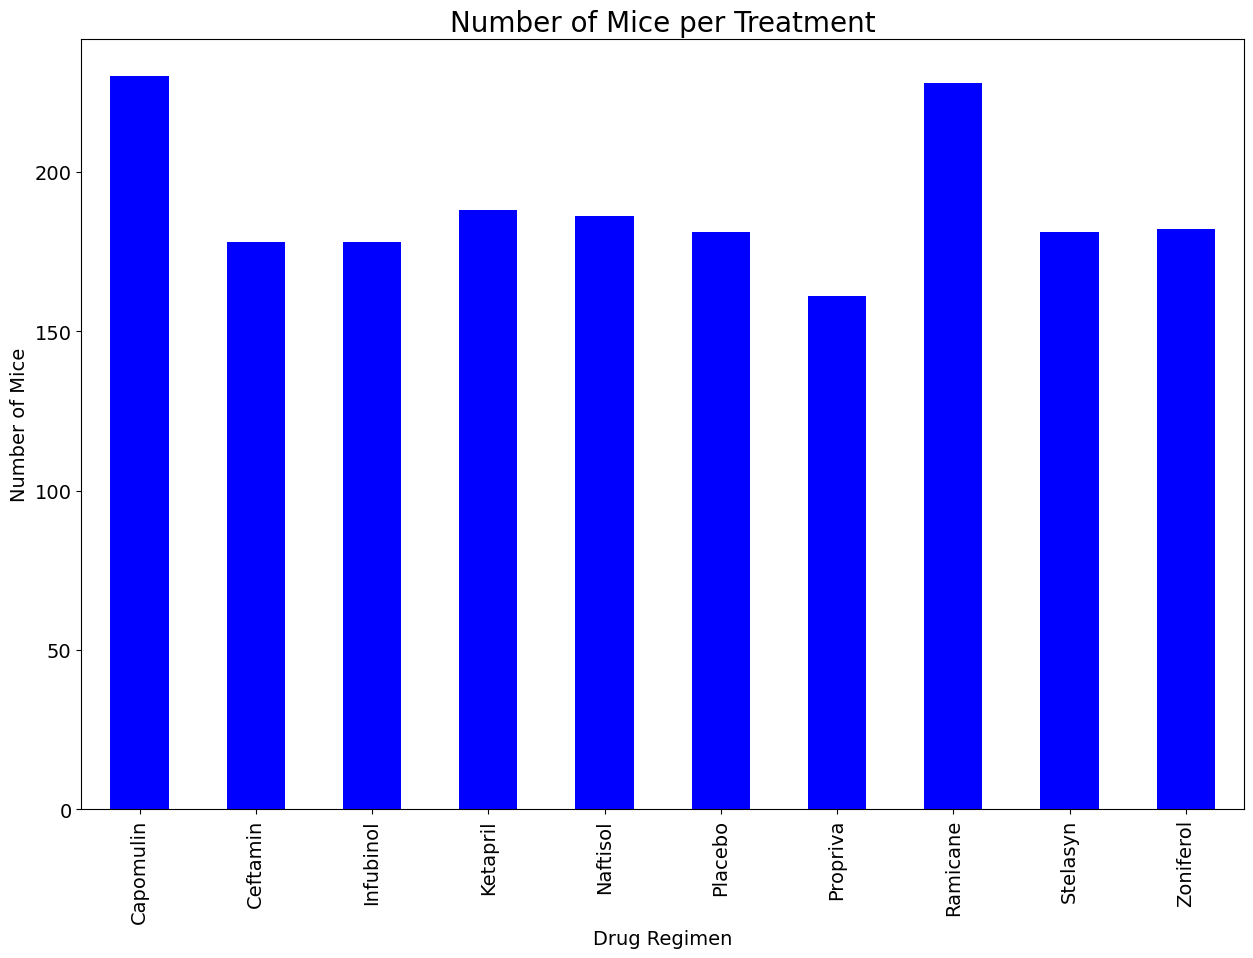

In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_treatment = total_results.groupby(["Drug Regimen"]).count()["Mouse ID"]

plt_pandas = mice_per_treatment.plot.bar(figsize=(15,10), color='b', fontsize = 14)
mice_per_treatment 

plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)
plt.title("Number of Mice per Treatment", fontsize = 20)


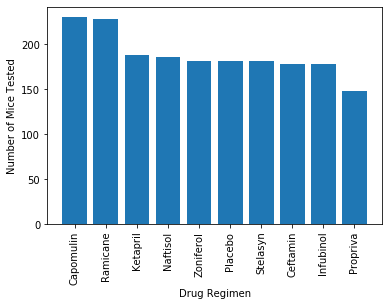

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_List = (total_results.groupby(["Drug Regimen"]) ["Mouse ID"].count()).tolist()

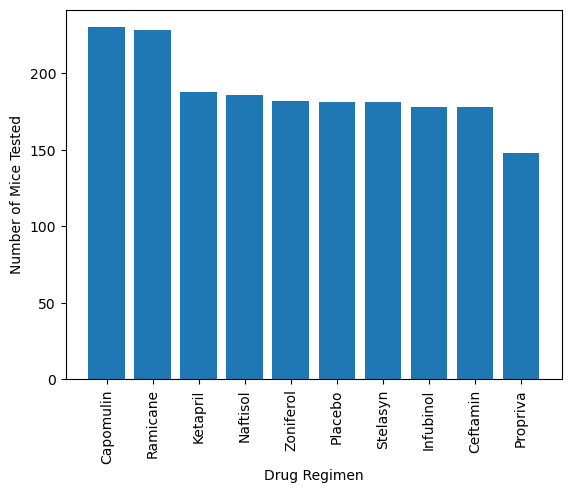

In [28]:
counts = clean_mouse_data['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()

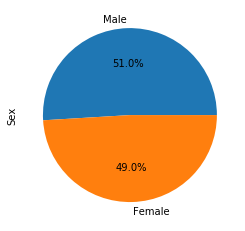

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

counts = clean_mouse_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()



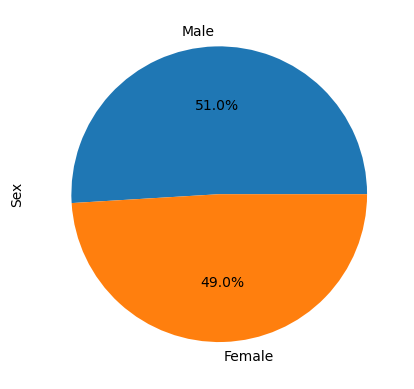

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = clean_mouse_data.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = max_tumor.merge(clean_mouse_data,on=['Mouse ID','Timepoint'],how="left")

merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [33]:
max_tumor = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

max_tumor


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [36]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

empty_treatment = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']    
    # add subset 
    
    empty_treatment.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds

    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


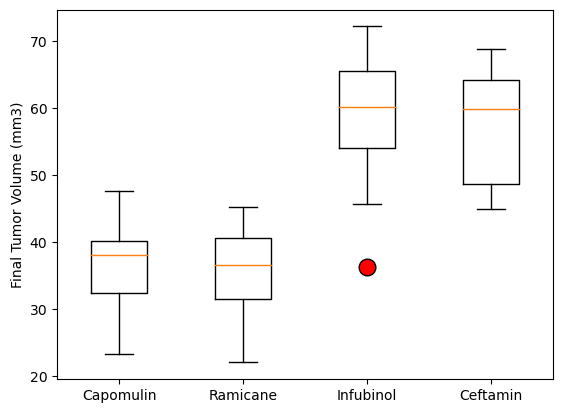

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(empty_treatment, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

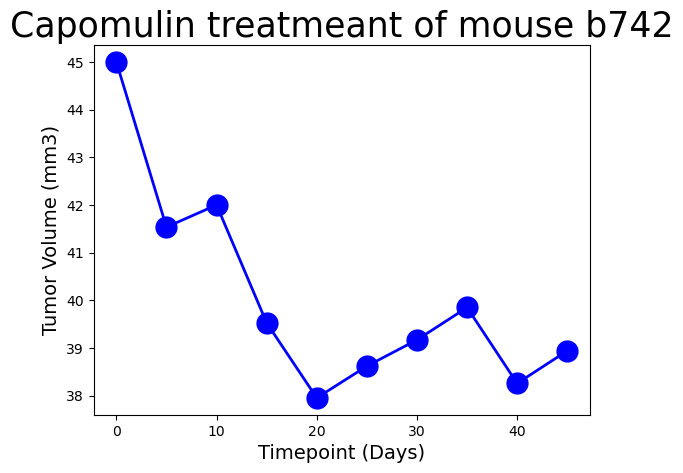

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "b742",:]

x_axis = forline["Timepoint"]
y_axis = forline["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, y_axis,linewidth=2, markersize=15,marker="o",color="blue",)
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()



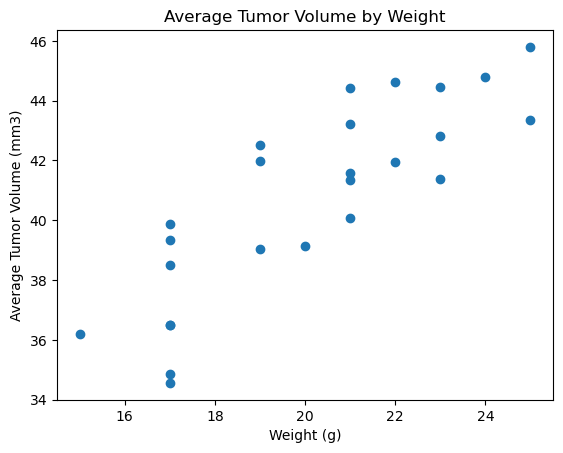

In [76]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()





## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


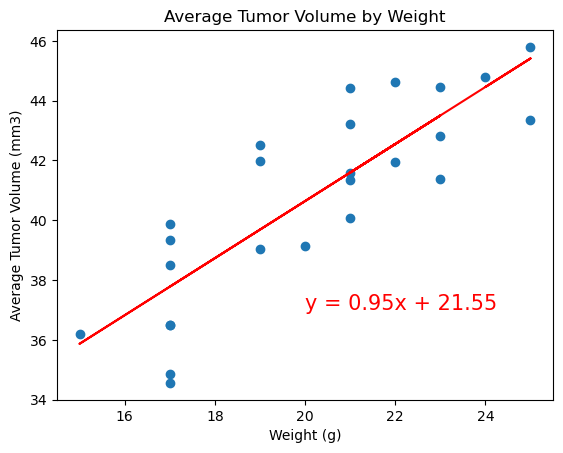

In [78]:

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capomulin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

